In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

In [2]:
size = 100, 100

img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]

Display

In [10]:
def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    plt.imsave(figure_title[:-5]+label2+".jpg", image2)
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)
    # Display the third image
    plt.imsave(figure_title[:-5]+label3+".jpg", image3)
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)
    plt.show()

Task 1

In [17]:
def mslabel(img_mat):
    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    shape = img_mat[:, :,0].shape
    b = img_mat[:, :,0].copy().flatten()
    g = img_mat[:, :,1].copy().flatten()
    r = img_mat[:, :,2].copy().flatten()
    # Step 2 - Combine the three colour channels by flatten each channel 
	# then stacking the flattened channels together.
    # This gives the "colour_samples"
    colour_samples = np.zeros((3,b.size))
    colour_samples[0] = b
    colour_samples[1] = g
    colour_samples[2] = r
    colour_samples = np.transpose(colour_samples)
    # Step 3 - Perform Meanshift  clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)
    # Step 4 - reshape ms_labels back to the original image shape 
	# for displaying the segmentation output 
    ms_labels = np.reshape(ms_labels, shape)
    return ms_labels

Task2

In [22]:
def wslabel(img):
    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_gray = img.convert("L")
    img_array = np.array(img_gray)
	
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
    
	
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=img_array)
    markers = ndi.label(local_maxi)[0]
	
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance,markers,mask=img_array)
    return ws_labels
    

c:\users\louha\appdata\local\programs\python\python37\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


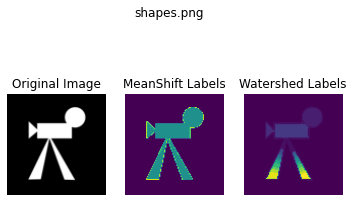

c:\users\louha\appdata\local\programs\python\python37\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


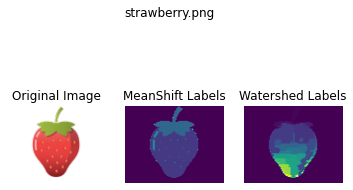

In [23]:
for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]

    #
    # +--------------------+
    # |     Task 1         |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.
    ms_labels = mslabel(img_mat)
    
    #%%
    #
    # +--------------------+
    # |     Task 2         |
    # +--------------------+
    #

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    ws_labels = wslabel(img)
    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    # plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",
    #                   ws_labels, "Watershed Labels")


In [ ]:
def wslabel2(img):
    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_gray = img.convert("L")
    img_array = np.array(img_gray)
	
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
    
	
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=img_array)
    markers = ndi.label(local_maxi)[0]
	
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance,markers,mask=img_array)
    return ws_labels

c:\users\louha\appdata\local\programs\python\python37\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


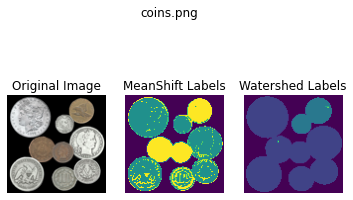

c:\users\louha\appdata\local\programs\python\python37\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


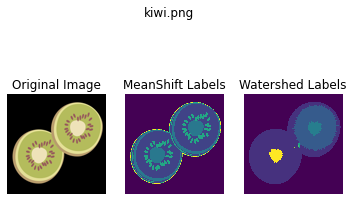

In [24]:
#%%
#
# +-------------------+
# |     Task 3        |
# +-------------------+
#
# Loop for the extension component
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)
    img_mat = np.array(img)[:, :, :3]

    # TODO: perform meanshift on image
    ms_labels = mslabel(img_mat)

    # TODO: perform an optimisation and then watershed on image
    ws_labels = wslabel(img)

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")